# **Crime Risk in DC**

### Packages

In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from descartes import PolygonPatch

pd.set_option('display.max_columns', 50)

### Read in API data (2019)
Crime Incidents API Website: https://opendata.dc.gov/datasets/crime-incidents-in-2019/geoservice  
Population API Website: https://opendata.dc.gov/datasets/census-block-groups-by-2004-population

In [3]:
url_crime = 'https://opendata.arcgis.com/datasets/f08294e5286141c293e9202fcd3e8b57_1.geojson'
df_crime = gpd.read_file(url_crime)

In [4]:
url_pop = 'https://opendata.arcgis.com/datasets/c070badb329040cd8db25b0de3ab1efb_4.geojson'
df_pop = gpd.read_file(url_pop)

### Clean API Data

In [5]:
df_crime = df_crime[['CCN', 'START_DATE', 'END_DATE', 'REPORT_DAT', 'SHIFT', 'WARD', 'CENSUS_TRACT', 'BLOCK', 'OFFENSE', 
                     'METHOD', 'LATITUDE', 'LONGITUDE', 'OBJECTID', 'OCTO_RECORD_ID', 'geometry']]

In [6]:
df_pop = df_pop[['TRACT', 'POP2004', 'SHAPE_Length', 'SHAPE_Area', 'geometry']]

### View API Data

In [7]:
df_crime.head()

,CCN,START_DATE,END_DATE,REPORT_DAT,SHIFT,WARD,CENSUS_TRACT,BLOCK,OFFENSE,METHOD,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID,geometry
0,19185375,2019-10-16T19:19:05,2019-10-16T20:57:17,2019-10-16T22:09:03,EVENING,2,005800,800 - 899 BLOCK OF 8TH STREET NW,THEFT F/AUTO,OTHERS,38.900337,-77.022953,353185569,19185375-01,POINT (-77.02296 38.90035)
1,19185377,2019-10-16T21:19:00,2019-10-16T21:20:53,2019-10-16T22:36:34,EVENING,2,010100,1400 - 1419 BLOCK OF L STREET NW,ROBBERY,OTHERS,38.903731,-77.032523,353185570,19185377-01,POINT (-77.03253 38.90374)
2,19185387,2019-10-16T21:47:29,None,2019-10-16T22:53:34,EVENING,2,010100,718 - 799 BLOCK OF 15TH STREET NW,THEFT/OTHER,OTHERS,38.899488,-77.033651,353185571,19185387-01,POINT (-77.03365 38.89950)
3,19185400,2019-10-16T13:57:43,2019-10-16T14:01:26,2019-10-16T22:36:28,EVENING,5,009509,4921 - 4999 BLOCK OF SARGENT ROAD NE,THEFT/OTHER,OTHERS,38.949840,-76.989537,353185572,19185400-01,POINT (-76.98954 38.94985)
4,19185407,2019-10-16T18:00:41,2019-10-16T23:28:44,2019-10-17T11:22:32,DAY,2,005800,700 - 799 BLOCK OF 6TH STREET NW,THEFT F/AUTO,OTHERS,38.899059,-77.019909,353185573,19185407-01,POINT (-77.01991 38.89907)


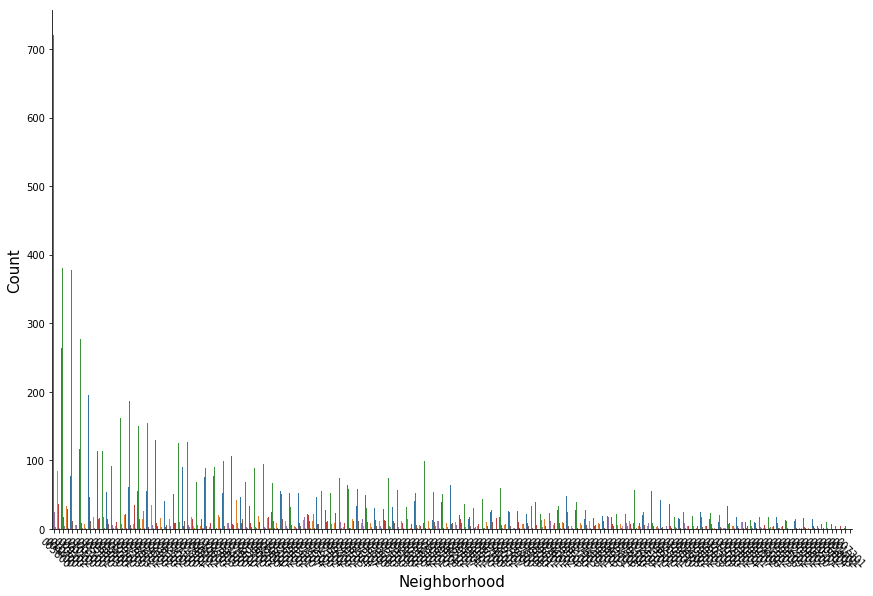

In [10]:
sns.catplot(x='CENSUS_TRACT', hue='OFFENSE', kind='count', height=8, aspect=1.5, 
            order=df_crime.CENSUS_TRACT.value_counts().index, data=df_crime, legend=False)
plt.xticks(size=10, rotation=-45)
plt.yticks(size=10)
plt.xlabel('Neighborhood', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [8]:
df_crime_grouped = pd.DataFrame(df_crime.groupby(['CENSUS_TRACT']).count())[['OFFENSE']]
df_crime_grouped = df_crime_grouped.reset_index()
df_crime_grouped.head()

,CENSUS_TRACT,OFFENSE
0,000100,436
1,000201,26
2,000202,458
3,000300,120
4,000400,30


In [11]:
df_pop.head()

,TRACT,POP2004,SHAPE_Length,SHAPE_Area,geometry
0,004801,524,1549.303075,136470.056374,"POLYGON ((-77.01683 38.91113, -77.01722 38.911..."
1,000100,1287,2168.617509,199324.533422,"POLYGON ((-77.05015 38.90964, -77.05042 38.909..."
2,005500,2242,2661.234403,218310.004833,"POLYGON ((-77.04391 38.90915, -77.04395 38.909..."
3,005401,1424,2550.412186,298641.736253,"POLYGON ((-77.04359 38.90904, -77.04366 38.909..."
4,004902,902,1184.212998,65740.853727,"POLYGON ((-77.02192 38.90858, -77.02215 38.908..."


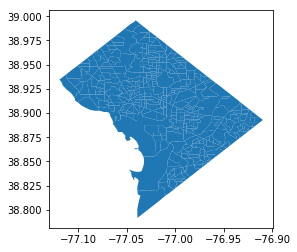

In [12]:
df_pop.plot()

### Combine Datasets

In [19]:
crime_pop = df_crime_grouped.merge(df_pop, left_on = 'CENSUS_TRACT', right_on = 'TRACT')
crime_pop = crime_pop.drop(['TRACT'], axis=1)
crime_pop = crime_pop.rename(columns={'OFFENSE': 'TotalOffenses'})
crime_pop.head()

,CENSUS_TRACT,TotalOffenses,POP2004,SHAPE_Length,SHAPE_Area,geometry
0,000100,436,1287,2168.617509,1.993245e+05,"POLYGON ((-77.05015 38.90964, -77.05042 38.909..."
1,000100,436,1254,4330.579470,8.111499e+05,"POLYGON ((-77.05909 38.91832, -77.05933 38.918..."
2,000100,436,1077,1874.896086,1.943296e+05,"POLYGON ((-77.05714 38.91055, -77.05739 38.910..."
3,000100,436,1009,6570.185341,1.162966e+06,"POLYGON ((-77.05549 38.90526, -77.05573 38.905..."
4,000201,26,4472,3237.651164,5.424962e+05,"POLYGON ((-77.07642 38.91265, -77.07747 38.912..."
